In [29]:
# Exercise 2
import numpy as np
import math
from matplotlib import pyplot as plt

In [30]:
radial_distance = np.loadtxt("laserscan.dat")
angle = np.linspace(-math.pi/2, math.pi/2 , radial_distance.shape[0])

In [31]:
X_Laserframe = radial_distance*np.cos(angle)
Y_Laserframe = radial_distance*np.sin(angle)
XY_Laserframe = np.vstack([X_Laserframe , Y_Laserframe])

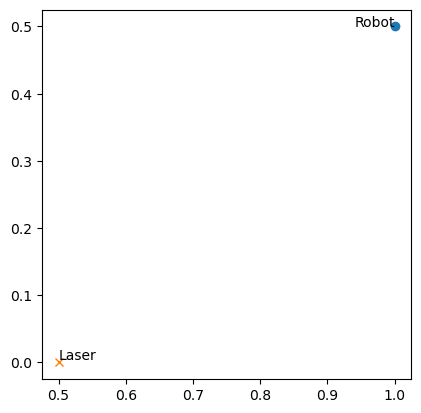

In [51]:
fig, ax = plt.subplots(1,1)
ax.plot(1,0.5, 'o')
plt.text(1,0.5,'Robot', horizontalalignment='right')
ax.plot(0.5, 0, 'x')
plt.text(0.5,0,'Laser', verticalalignment='bottom')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

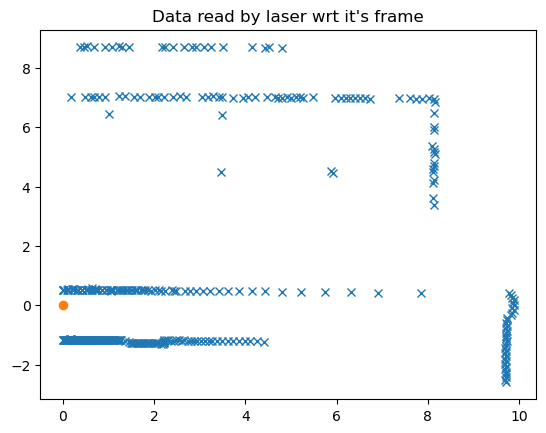

In [32]:
fig, ax = plt.subplots(1,1)
ax.plot(X_Laserframe,Y_Laserframe, 'x')
ax.plot(0,0, 'o')
ax.set_title("Data read by laser wrt it's frame")
plt.show()

In [60]:
omega = 5*math.pi/4

# Transformation matrix for converting points in global frame
T_to_global = np.array([[np.cos(omega),-np.sin(omega),0.2],[np.sin(omega), np.cos(omega), 0],[0,0,1]])
print("Transformation matrix : \n", T_to_global)

Transformation matrix : 
 [[-0.70710678  0.70710678  0.2       ]
 [-0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [61]:
ones = np.ones(XY_Laserframe.shape[1])
XY_LaserFrame = np.vstack([XY_Laserframe, ones])
print("XY_LaserFrame : \n", XY_LaserFrame)

XY_LaserFrame : 
 [[ 7.10295144e-17  1.01227812e-02  2.04193155e-02 ...  9.07525135e-03
   4.62506381e-03  3.12284934e-17]
 [-1.16000000e+00 -1.15995583e+00 -1.16982180e+00 ...  5.19920801e-01
   5.29979819e-01  5.10000000e-01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]]


In [62]:
XY_Global = np.matmul(T_to_global, XY_LaserFrame)
XY_Global

array([[-0.62024387, -0.62737052, -0.64162757, ...,  0.56122235,
         0.57148191,  0.56062446],
       [ 0.82024387,  0.81305475,  0.81275029, ..., -0.3740567 ,
        -0.37802274, -0.36062446],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

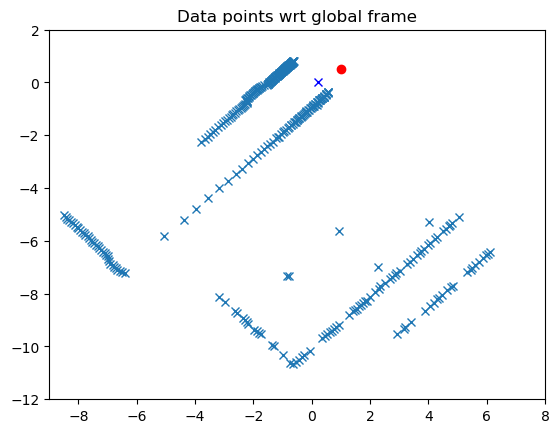

In [74]:
_, axis = plt.subplots(1,1)
axis.plot(XY_Global[0,:], XY_Global[1,:], 'x')
axis.set_title("Data points wrt global frame")
axis.plot(1,0.5, 'o' ,color= 'r')
axis.plot(0.2,0, 'x' ,color= 'b')
plt.xlim(-9, 8)
plt.ylim(-12, 2)
plt.show()